               Feature  Coefficient
0          subscribers     1.411694
5            num_rules    -1.055748
1         active_users    -0.920828
3       num_moderators    -0.424601
8     economic_capital     0.247378
6           is_default    -0.238906
2        subreddit_age     0.200103
7  user_social_capital     0.114012
4          has_automod    -0.038524
9     cultural_capital     0.008699


/var/folders/sl/lp2z3s1x35qfm3vs1r5wjxmm0000gn/T/ipykernel_95582/1555195786.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="coolwarm")


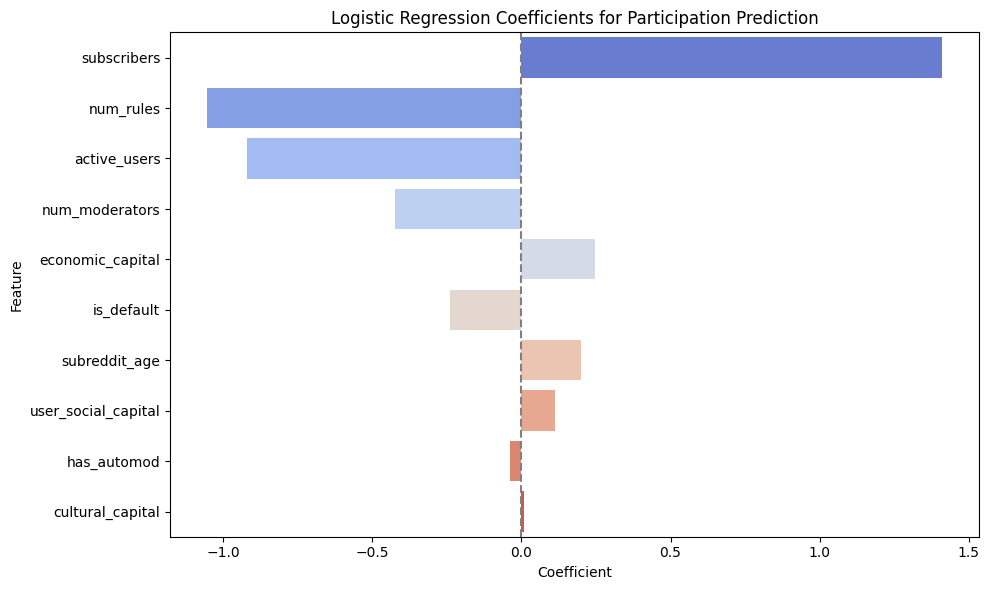

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Load JSON into Python list
with open("/Users/preethi/Documents/Spring25/SC/SCProject/CS6474/features/final_all.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 1: Encode 'user_social_capital', 'economic_capital', and 'cultural_capital'
capital_map = {"low": 0, "high": 1, "not applicable": -1}
df["user_social_capital"] = df["user_social_capital"].map(capital_map)
df["economic_capital"] = df["economic_capital"].map(capital_map)
df["cultural_capital"] = df["cultural_capital"].map(capital_map)

# Step 2: Select features and target
X = df[[
    "subscribers", "active_users", "subreddit_age", "num_moderators", "has_automod", "num_rules", "is_default",
    "user_social_capital", "economic_capital", "cultural_capital"
]]
X = X.fillna(0)
y = df["participating"]

# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Fit logistic regression
model = LogisticRegression()
model.fit(X_scaled, y)

# Step 5: Output coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coefficients)

# Step 6: Visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Logistic Regression Coefficients for Participation Prediction")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
